# Credit Card Fraud Detection

Credit card fraud detection is a crucial application of machine learning and data science. It involves identifying and preventing fraudulent credit card transactions to protect both consumers and businesses.

# Importing Libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Here df1 represents the Training dataset and the df2 represents the dataset2

In [3]:
df1 = pd.read_csv('fraudTrain.csv')
df2 = pd.read_csv('fraudTest.csv')

# Data PreProcessing

In [4]:
df1.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
df2.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [6]:
df1.info(),df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

(None, None)

In [7]:
df1.isnull().sum(),df2.isnull().sum()

(Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     0
 state                    0
 zip                      0
 lat                      0
 long                     0
 city_pop                 0
 job                      0
 dob                      0
 trans_num                0
 unix_time                0
 merch_lat                0
 merch_long               0
 is_fraud                 0
 dtype: int64,
 Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     0
 state                    0
 zip 

In [8]:
drop_columns = ['Unnamed: 0','cc_num','merchant','trans_num','unix_time','first','last','street','zip']
df1.drop(columns=drop_columns,inplace=True)
df2.drop(columns=drop_columns,inplace=True)

In [9]:
print(df1.shape)
print(df2.shape)

(1296675, 14)
(555719, 14)


In [11]:
from datetime import datetime as dt
df1['trans_date_trans_time']=pd.to_datetime(df1['trans_date_trans_time'])
df1['trans_date']=df1['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df1['trans_date']=pd.to_datetime(df1['trans_date'])
df1['dob']=pd.to_datetime(df1['dob'])

df2['trans_date_trans_time']=pd.to_datetime(df2['trans_date_trans_time'])
df2['trans_date']=df2['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df2['trans_date']=pd.to_datetime(df2['trans_date'])
df2['dob']=pd.to_datetime(df2['dob'])

In [12]:
df1["age"] = df1["trans_date"]-df1["dob"]
df1["age"]=df1["age"].astype('timedelta64[Y]')

df2["age"] = df2["trans_date"]-df2["dob"]
df2["age"]=df2["age"].astype('timedelta64[Y]')

In [13]:
df1['trans_month'] = pd.DatetimeIndex(df1['trans_date']).month
df1['trans_year'] = pd.DatetimeIndex(df1['trans_date']).year

In [14]:
drop_columns = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date','state']
df1.drop(columns=drop_columns,inplace=True)
df2.drop(columns=drop_columns,inplace=True)

In [15]:
df1.gender=df1.gender.apply(lambda x: 1 if x=="M" else 0)
df2.gender=df2.gender.apply(lambda x: 1 if x=="M" else 0)

In [16]:
df1 = pd.get_dummies(df1, columns=['category'], prefix='category')
df2 = pd.get_dummies(df2, columns=['category'], prefix='category')

df2 = df2.reindex(columns=df1.columns, fill_value=0)

In [17]:
df1.head()

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,category_entertainment,category_food_dining,category_gas_transport,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,3495,0,30.0,1,2019,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,107.23,0,149,0,40.0,1,2019,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,220.11,1,4154,0,56.0,1,2019,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45.00,1,1939,0,51.0,1,2019,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,41.96,1,99,0,32.0,1,2019,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [39]:
df2.head()

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,category_entertainment,category_food_dining,category_gas_transport,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,1,333497,0,52.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,29.84,0,302,0,30.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,41.28,0,34496,0,49.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,60.05,1,54767,0,32.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3.19,1,1126,0,64.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Data Visulization

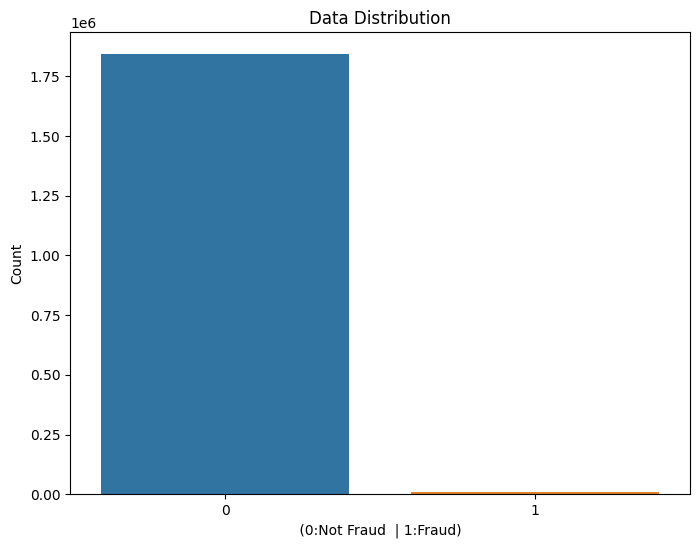

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=pd.concat([df1, df2], ignore_index=True))
plt.title('Data Distribution')
plt.xlabel(' (0:Not Fraud  | 1:Fraud) ')
plt.ylabel('Count')
plt.show()

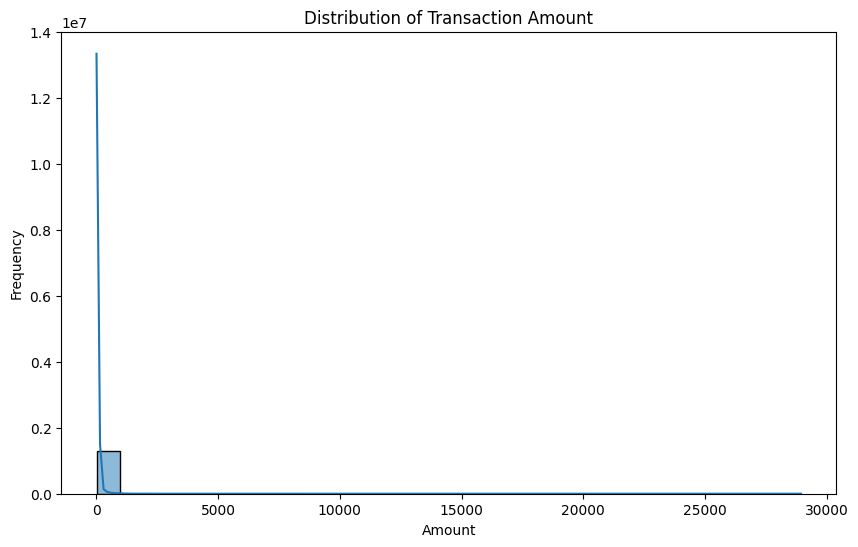

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['amt'], bins=30, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Model Evalution

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
X_train = df1.drop('is_fraud', axis=1)
y_train = df1['is_fraud']
X_test = df2.drop('is_fraud', axis=1)
y_test = df2['is_fraud']

# Decision Tree Algorithm

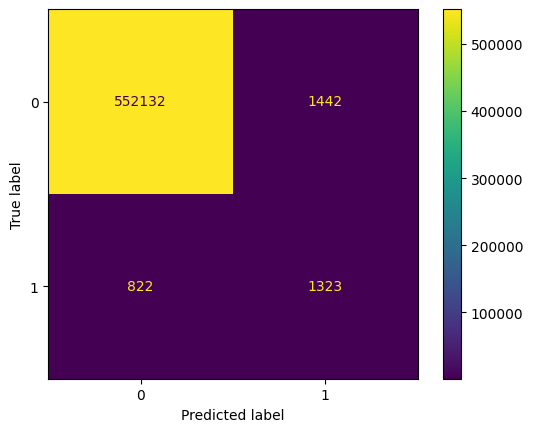

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

In [30]:
print(report)
print("Accuracy:",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.48      0.62      0.54      2145

    accuracy                           1.00    555719
   macro avg       0.74      0.81      0.77    555719
weighted avg       1.00      1.00      1.00    555719

Accuracy: 0.9959259985712203


# Random Forest Classifier

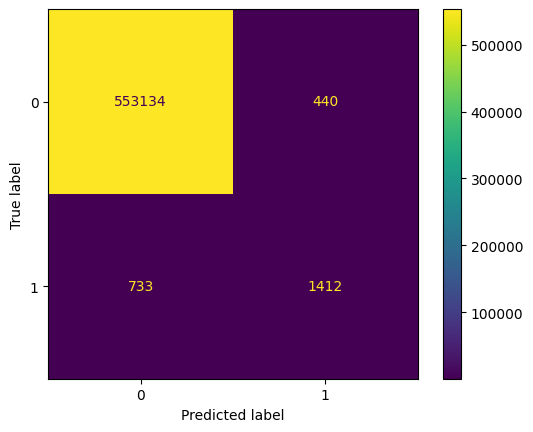

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

In [33]:
print(report)
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.76      0.66      0.71      2145

    accuracy                           1.00    555719
   macro avg       0.88      0.83      0.85    555719
weighted avg       1.00      1.00      1.00    555719

0.9978892209911844
